#### Importing the required libraries

In [276]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

#### Defining ReLU activation and its derivative

In [237]:
def relu(x):
    return np.maximum(0,x)

def der_relu(x):
    return np.heaviside(1,x)


#### Defining tanh activation and its derivative

In [280]:
def tanh(x):
    return np.tanh(x)

def der_tanh(x):
    return 1-np.tanh(x)**2

#### Defining softmax activation

In [277]:
def softmax(x):
    exp_x=np.exp(x)
    sum=np.sum(exp_x,axis=1,keepdims=True)
    return exp_x/sum

#### Function to calculate accuracy

In [23]:
def accuracy_cal(output,Prediction_array):
    count=0
    for i in range(len(output)):
        if(np.argmax(output[i])==np.argmax(Prediction_array[i])):
            count+=1
    return (count/len(output))*100

#### Creating the neural network for classification

In [377]:
def Feedforward(x,y,hidden_activation, output_activation,w1,w2,w3,b1,b2,b3):
    # First hidden layer
    s_1=((x @ w1.T)+b1.T)
    a_1=hidden_activation(s_1)
    # Second hidden layer
    s_2=(a_1 @ w2.T)+b2.T
    a_2=hidden_activation(s_2)
    # Output layer
    s_3=(a_2 @ w3.T)+b3.T
    a_3=output_activation(s_3)
    #CE=-np.sum(y.T @ np.log2(a_3))
    return a_3,a_2,a_1

In [392]:
def back_propagation(X,y,w1,w2,w3,b1,b2,a1,a2,a3,batchsize):
    da2 = der_relu(a1@w2.T+b2.T)
    da1 = der_tanh(X@w1.T+b1.T)
    
    delta_3 = a3 - y
    delta_2 = np.dot(delta_3,w3)*da2
    delta_1 = np.dot(delta_2,w2)*da1
    
    dW3 = (np.dot(a2.T,delta_3)/batchsize).T
    dW2 = (np.dot(a1.T,delta_2)/batchsize).T
    dW1 = (np.dot(X.T,delta_1)/batchsize).T
    db3 = (np.sum(delta_3, axis=0)/batchsize).reshape(10,1)
    db2 = (np.sum(delta_2, axis=0)/batchsize).reshape(100,1)
    db1 = (np.sum(delta_1, axis=0)/batchsize).reshape(300,1)
    return dW1,dW2,dW3,db1, db2, db3

#### Function to predict output array when input is passed

In [383]:
def predict_ar(x,hidden_activation, output_activation,w1,w2,w3,b1,b2,b3):
    s_1=((x @ w1.T)+b1.T)
    a_1=hidden_activation(s_1)
    # Second hidden layer
    s_2=(a_1 @ w2.T)+b2.T
    a_2=hidden_activation(s_2)
    # Output layer
    s_3=(a_2 @ w3.T)+b3.T
    a_3=output_activation(s_3)
    #CE=-np.sum(y.T @ np.log2(a_3))
    return a_3

In [408]:
def MLP_train(batch_size,epochs,train_input,train_target,val_data,val_target,eta,hidden_act,output_act):
    w1=np.random.normal(size=(300,784))*np.sqrt(2/784)
    b1=np.zeros((300,1))
    w2=np.random.normal(size=(100,300))*np.sqrt(2/300)
    b2=np.zeros((100,1))
    w3=np.random.normal(size=(10,100))*np.sqrt(2/100)
    b3=np.zeros((10,1))
    train_accuracy_list=[]
    val_accuracy_list=[]
    for i in range(epochs):
        size=train_input.shape[0]
        shuffle=np.array(np.random.permutation(size))
        train_data=train_input[shuffle,:]
        train_output=train_target[shuffle,:]
        if(epochs==20):
            eta/=2
        if(epochs==40):
            eta/=2
        mini_length=int(size/batch_size)
        for j in range(mini_length):
            data_mini=train_data[j*batch_size:(j+1)*batch_size,:]
            output_mini=train_output[j*batch_size:(j+1)*batch_size,:]
            a_3,a_2,a_1=Feedforward(data_mini,output_mini,hidden_act,output_act,w1,w2,w3,b1,b2,b3)
            dW1,dW2,dW3,db1, db2, db3=back_propagation(data_mini,output_mini,w1,w2,w3,b1,b2,a_1,a_2,a_3,batch_size)
            w3-=eta*dW3
            w2-=eta*dW2
            w1-=eta*dW1
            b3-=eta*db3
            b2-=eta*db2
            b1-=eta*db1
        train_accuracy_list.append(accuracy_cal(train_target,predict_ar(train_input,hidden_act,output_act,w1,w2,w3,b1,b2,b3)))
        if(val_target!='None' and val_data!='None'):
            val_accuracy_list.append(accuracy_cal(val_target,predict_ar(val_data,hidden_act,output_act,w1,w2,w3,b1,b2,b3)))
    return train_accuracy_list,val_accuracy_list,w1,w2,w3,b1,b2,b3

#### Extracting data

In [405]:
file_name="mnist_traindata.hdf5"
mnist_traindata = h5py.File(file_name, 'r')
mnist_traindata.keys()
train_data=mnist_traindata['xdata'][:50000]
train_output=mnist_traindata['ydata'][:50000]
val_data=mnist_traindata['xdata'][50000:]
val_output=mnist_traindata['ydata'][50000:]
train_total_data=mnist_traindata['xdata'][:]
train_total_target=mnist_traindata['ydata'][:]

#### For ReLU activation with learning rates 0.01,0.03,0.05

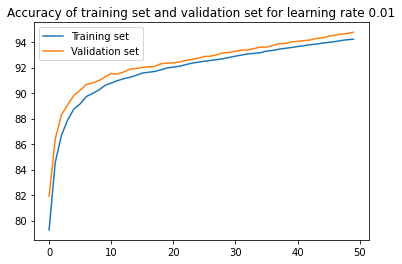

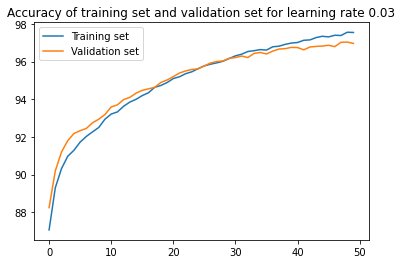

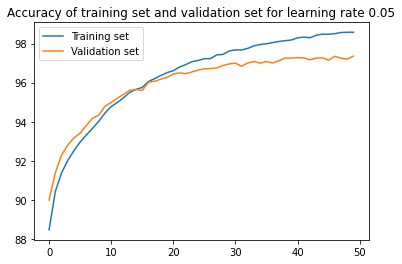

In [401]:
eta_list=[0.01,0.03,0.05]
for i in eta_list:
    train_accuracy_list,val_accuracy_list,w1,w2,w3,b1,b2,b3=MLP_train(200,50,train_data,train_output,val_data,val_output,i,relu,softmax)
    plt.title("Accuracy of training set and validation set for learning rate {0}".format(i))
    plt.plot(train_accuracy_list)
    plt.plot(val_accuracy_list)
    plt.legend(['Training set','Validation set'])
    plt.show()

#### For Tanh activation with learning rates 0.01,0.03,0.05

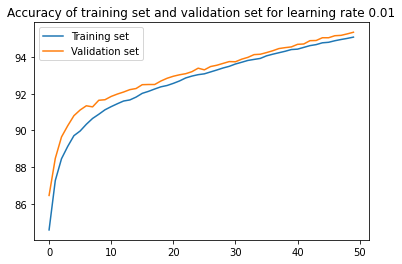

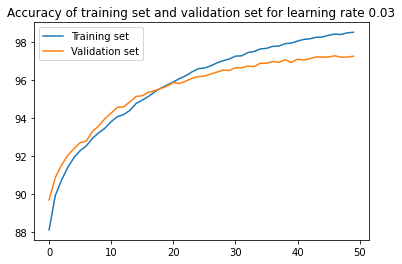

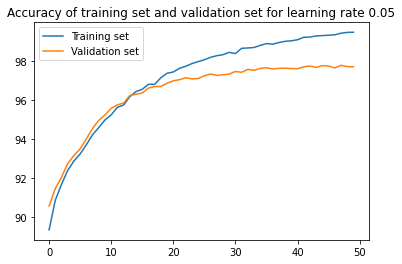

In [402]:
for i in eta_list:
    train_accuracy_list,val_accuracy_list,w1,w2,w3,b1,b2,b3=MLP_train(200,50,train_data,train_output,val_data,val_output,i,tanh,softmax)
    plt.title("Accuracy of training set and validation set for learning rate {0}".format(i))
    plt.plot(train_accuracy_list)
    plt.plot(val_accuracy_list)
    plt.legend(['Training set','Validation set'])
    plt.show()

#### Choosing the model which gives best accuracy

#### From the plots we can infer, best validation set accuracy is for hidden activation of  tanh and  learning rate of 0.03

#### Using best configuration to train for all training data 

In [409]:
train_accuracy_list,val_accuracy_list,w1,w2,w3,b1,b2,b3=MLP_train(200,50,train_total_data,train_total_target,'None','None',0.03,tanh,softmax)

#### Using these weights to find the test set accuracy

In [412]:
file_name="mnist_testdata.hdf5"
mnist_testdata = h5py.File(file_name, 'r')
mnist_testdata.keys()
test_data=mnist_testdata['xdata']
test_labels=mnist_testdata['ydata']

In [413]:
accuracy_test=accuracy_cal(test_labels,predict_ar(test_data,tanh,softmax,w1,w2,w3,b1,b2,b3))
print("Accuracy on test set is {0}".format(accuracy_test))

Accuracy on test set is 97.42


### Final test set accuracy is 97.42 %

#### Network configuration

### Fully connected layers (2 Hidden layers)
### Input Layer - 784 Neurons
### first hidden layer - 300 Neurons
### Second hidden layer - 100 Neurons
### Output layer- 10 Neurons 

#### Batch size - 200
#### Values of learning rate -0.01 ,0.03 ,0.05
#### Initializing parameters - He Normal initialization